# Mapping LA's Public Toilets
## Kevin Liu, Paola Tirado Escareno, Carolyn Chu
## UP 229: Urban Data Science, Spring 2022

**Introduction**

In the early months of the COVID-19 shutdown, restaurants, libraries, and gas stations closed their bathroom facilities due to the unknown nature of how the virus spread. For much of the general public, finding a restroom to use while out of their home was a novel problem borne by public health response. Though for unhoused people, this challenge precedes the pandemic, and the response by cities to serve this need has been varied. The COVID-19 pandemic brought renewed attention to the issue of unhoused people's access to restrooms. (WIP)

Our research questions include, "What's the distribution of publicly available toilets in Los Angeles and how does this compare to the distribution of unhoused people in the county? Through spatial clustering, can we find patterns in this distribution? What kinds of correlation do we find between publicly available toilets and race/ethnicity of certain census tracts?" 

**Data Preparation**

Previous to this notebook, we compiled a dataset of publicly available toilets from a variety of data sources including LACAN, Los Angeles Recreation and Parks, and the L.A. and Los Angeles County Library systems. We also joined the Los Angeles County Homeless Count Data (2020) with 5-Year American Community Survey population counts and census tract geometries (which we acquired from the census API and LA County Open Data Portal, respectively). We bring these datsets in at the beginning of this notebook.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

### Import Data

In [40]:
#upload toilet data
toilets = gpd.read_file('alltoilets.geojson')

In [41]:
#upload homeless data count
counts = gpd.read_file('homelesscount_tracts.geojson').to_crs('EPSG:4326')

### Spatial Join of Toilets and Point in Time Count

In [42]:
joinedGdf = gpd.sjoin(counts, toilets, how='left', predicate = 'intersects')
joinedGdf.head()

,short_geoid,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,total_pop,homeless_count,geometry,index_right,name,type,branch_name
0,911001,4025735684.42,9110.01,6620403.0,911001,1998891.0,06037911001,353933.808192,4087.0,30.0,"MULTIPOLYGON (((-117.66712 34.55801, -117.6671...",NaN,NaN,NaN,NaN
1,980003,2078689856.02,9800.03,6575300.0,980003,2112006.0,06037980003,273188.86321,0.0,925.0,"MULTIPOLYGON (((-117.88061 34.76362, -117.8825...",NaN,NaN,NaN,NaN
2,930301,11118018325.1,9303.01,6603027.0,930301,1932124.0,06037930301,628603.531323,869.0,928.0,"MULTIPOLYGON (((-117.65524 34.39722, -117.6551...",NaN,NaN,NaN,NaN
3,573003,4824001.88224,5730.03,6500215.0,573003,1747305.0,06037573003,9050.00845755,2016.0,2.0,"MULTIPOLYGON (((-118.19923 33.79712, -118.1992...",NaN,NaN,NaN,NaN
4,297602,6697030.7108,2976.02,6473372.0,297602,1719119.0,06037297602,12308.3153848,4005.0,64.0,"MULTIPOLYGON (((-118.28798 33.72258, -118.2879...",NaN,NaN,NaN,NaN


In [43]:
#check whether lengths are ok - looks reasonable
print('counts length: {}'.format(len(counts)))
print('toilets length: {}'.format(len(toilets)))
print('joinedGdf length: {}'.format(len(count_sjoin)))


counts length: 2345
toilets length: 374
joinedGdf length: 2469


In [46]:
#data exploration - we can delete this cell in the final notebook
#made a version with the homeless count descending

#count_descending = count_sjoin.sort_values(by ='homeless_count', ascending=False)
#count_descending.head()

### Map the datasets
(This is the same as your previous notebooks, Kevin)

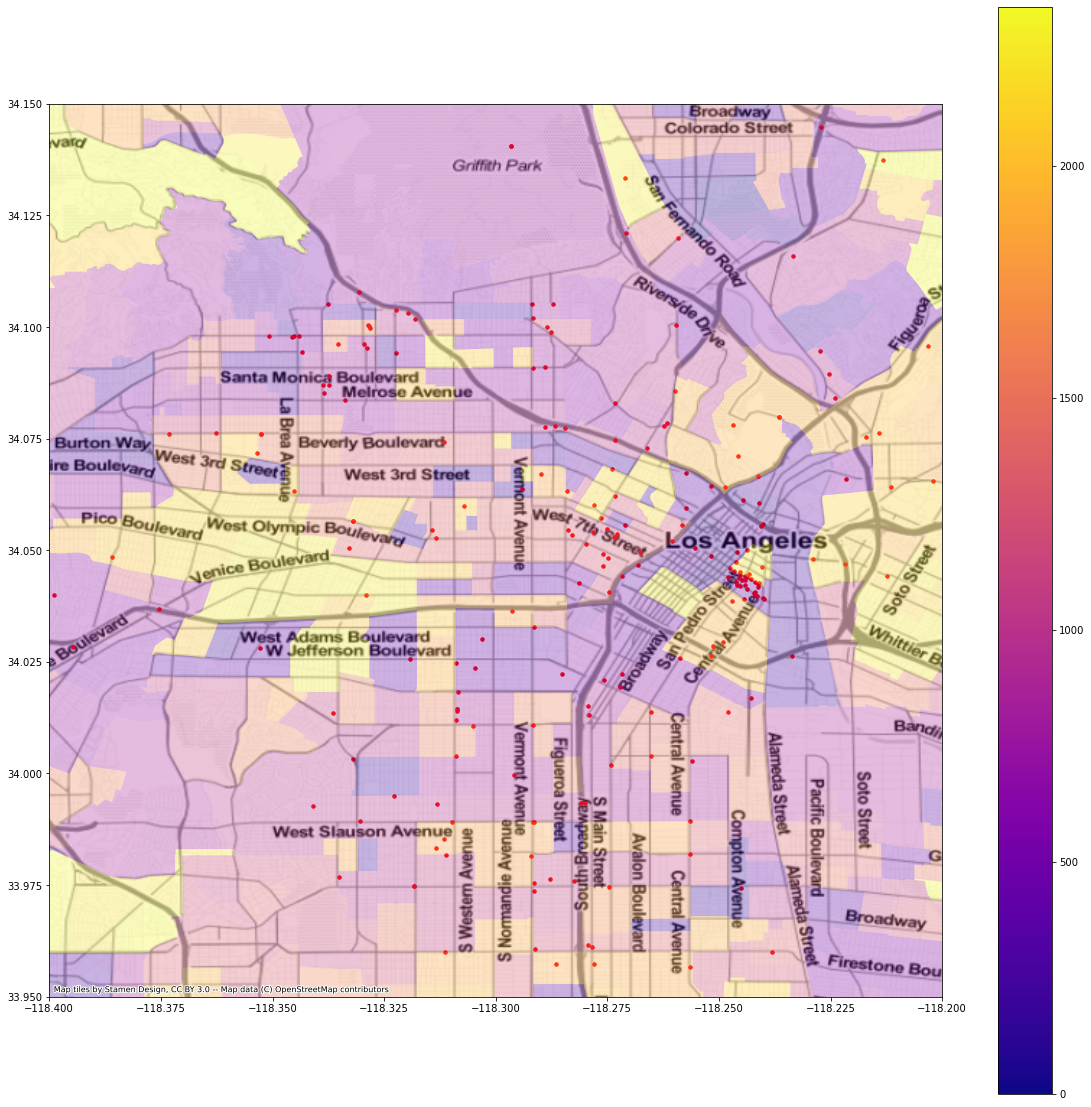

In [37]:
import contextily as ctx
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(20,20))

toilets.plot(ax=ax,
             color='red',
             markersize=12)

counts.plot('homeless_count', 
            ax=ax, 
            cmap='plasma', 
            legend=True, 
            legend_kwds={'orientation': 'vertical'}, 
            alpha=0.3, 
            label='Count')

# no axis
#ax.axis('off')
ax.set_xlim([-118.4, -118.2]) 
ax.set_ylim([33.95, 34.15])

# add a basemap
ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)